<a href="https://colab.research.google.com/github/Darshan0805/Advanced-Machine-Learning/blob/main/2348548_Program1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Program_1_Dataset - Program_1_Dataset.csv')

In [ ]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crime_Rate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
Zone_proportion,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
Non_Retail_Acres,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
Avg_rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
Distance,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
Property_TaxRate,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
X = df[['Avg_rooms']]
y = df['MValue']

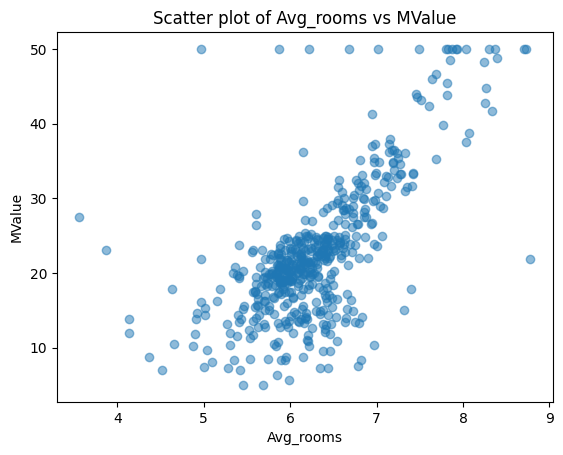

In [ ]:
plt.scatter(X, y, alpha=0.5)
plt.title('Scatter plot of Avg_rooms vs MValue')
plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.show()


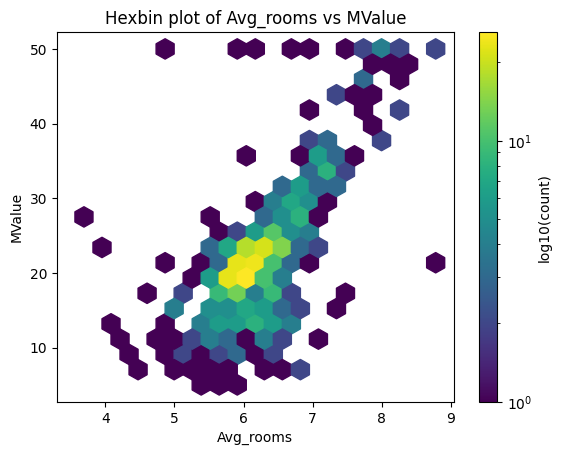

In [ ]:
plt.hexbin(X.values.flatten(), y, gridsize=20, cmap='viridis', bins='log')
plt.title('Hexbin plot of Avg_rooms vs MValue')
plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.colorbar(label='log10(count)')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
coefficient = model.coef_[0]
intercept = model.intercept_
print(f'Coefficient: {coefficient}')
print(f'Intercept: {intercept}')

Coefficient: 8.926202222337784
Intercept: -33.510147597513345


In [ ]:
# Training set
train_predictions = model.predict(X_train)
mse_train = mean_squared_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)

In [ ]:
# Testing set
test_predictions = model.predict(X_test)
mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

In [ ]:
print(f'Mean Squared Error (Training): {mse_train}')
print(f'R-squared (Training): {r2_train}')
print(f'Mean Squared Error (Testing): {mse_test}')
print(f'R-squared (Testing): {r2_test}')

Mean Squared Error (Training): 47.81170547959663
R-squared (Training): 0.46176397399316227
Mean Squared Error (Testing): 33.853804802145724
R-squared (Testing): 0.5424461839891813



The linear regression model is used to predict the median value of owner-occupied homes (MValue) based on the average number of rooms (Avg_rooms) demonstrates a positive relationship between these variables. The model suggests that, on average, each additional room is associated with an increase of approximately $8,926 in the median home value. The model's R-squared value of 0.54 indicates that it captures 54% of the variance in MValue using Avg_rooms. The mean squared error on the testing set is 33.85, reflecting the average squared difference between predicted and actual values. While the linear regression provides a useful baseline understanding, it's crucial to acknowledge the simplifications inherent in the model, as housing prices are influenced by a multitude of factors. Further model refinement could involve exploring additional features and considering more complex algorithms to enhance predictive accuracy.